# Health Lifestyle Dataset - EDA and Feature Engineering

## Personal Perspective Health Status Analysis

Analysis of key factors affecting health status from a personal lifestyle perspective.

In [172]:
# Import necessary libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations and array handling
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Higher-level statistical plots
from scipy import stats  # Statistical functions
from scipy.stats import chi2_contingency # Chi-square test for independence of categorical variables

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

## 1. Data Loading and Initial Exploration

In [173]:
# Load the cleaned dataset
df = pd.read_csv('data/cleaned_data.csv')
df.shape

(93436, 38)

In [174]:
# Display basic dataset information
df.head()

survey_code  age  gender      height     weight  bmi_scaled  bmi_corrected  \
0            2   69  Female  163.207380  97.799859  110.148833      36.511417   
1            3   46    Male  177.281966  80.687562   77.019151      25.587429   
2            4   32  Female  172.101255  63.142868   63.955440      21.177109   
3            5   60  Female  163.608816  40.000000   44.829907      14.844299   
4            6   25    Male  186.788025  55.276111   47.529218      16.087835   

   waist_size  blood_pressure  cholesterol     glucose  sleep_hours  \
0   85.598889      117.917986   115.794002  116.905134     8.428410   
1   90.295030      123.073698   138.134787   89.180302     5.702164   
2  100.504211      148.173453   203.017447  128.375798     5.188316   
3   69.021150      150.613181   200.412439   94.813332     7.912514   
4   86.591923      118.722971   165.659179   99.496769    10.065352   

  sleep_quality  work_hours  physical_activity   daily_steps  calorie_intake  \
0          Good    9.515198           0.568219  11911.201401     2650.376972   
1          Poor    5.829853           3.764406   2974.035375     1746.755144   
2          Good    9.489693           0.889474   5321.539497     2034.193242   
3          Good    7.275450           2.901608   9791.376712     2386.210257   
4          Poor    8.536500           3.581308   9221.120390     2565.731983   

   sugar_intake smoking_level  water_intake  screen_time  stress_level  \
0     74.663405         Light      0.716409     5.925455             3   
1     19.702382         Heavy      2.487900     4.371250             0   
2     82.580050         Heavy      2.643335     4.116064            10   
3     45.961322         Heavy      1.968393     3.180087             9   
4     71.999679         Heavy      2.115213     5.878847             7   

   mental_health_score mental_health_support education_level    job_type  \
0                    9                    No     High School      Office   
1                    1                    No          Master      Office   
2                    4                    No          Master       Labor   
3                    7                   Yes          Master  Unemployed   
4                    6                    No     High School      Office   

  occupation       income   diet_type device_usage healthcare_access  \
0   Engineer  6240.517690       Vegan     Moderate          Moderate   
1    Teacher  3429.179266       Vegan         High              Good   
2    Teacher  2618.503534  Vegetarian          Low          Moderate   
3     Doctor  3662.086276       Vegan          Low          Moderate   
4    Teacher  3667.151536  Vegetarian          Low          Moderate   

  insurance sunlight_exposure  meals_per_day family_history pet_owner  \
0        No              High              5            Yes        No   
1       Yes              High              4             No        No   
2        No              High              1             No       Yes   
3       Yes              High              1            Yes       Yes   
4       Yes              High              4            Yes       Yes   

   daily_supplement_dosage   target  
0                 6.239340  healthy  
1                 5.423737  healthy  
2                 8.388611  healthy  
3                 0.332622  healthy  
4                 8.985465  healthy

In [175]:
# Basic statistical information
df.describe().transpose()

count          mean           std          min  \
survey_code              93436.0  49984.849234  28861.531171     2.000000   
age                      93436.0     48.508605     17.884491    18.000000   
height                   93436.0    170.148603      9.593511   143.177643   
weight                   93436.0     69.705178     14.298446    40.000000   
bmi_scaled               93436.0     72.889668     16.926223    30.978455   
bmi_corrected            93436.0     24.296761      5.645244    10.184850   
waist_size               93436.0     84.941562     11.881606    48.839910   
blood_pressure           93436.0    119.970250     14.194220    76.704253   
cholesterol              93436.0    189.965502     29.563990   100.100173   
glucose                  93436.0     99.999978     19.718619    40.207340   
sleep_hours              93436.0      6.985897      1.476358     3.000000   
work_hours               93436.0      8.002860      1.971898     2.025625   
physical_activity        93436.0      3.014333      1.855295     0.000000   
daily_steps              93436.0   6959.630036   2319.525330  1000.000000   
calorie_intake           93436.0   2201.924689    394.453348  1000.066378   
sugar_intake             93436.0     60.087582     19.383467     6.266801   
water_intake             93436.0      1.998748      0.679475     0.500000   
screen_time              93436.0      5.989972      2.890552     0.000000   
stress_level             93436.0      4.989522      3.153097     0.000000   
mental_health_score      93436.0      5.003339      3.163166     0.000000   
income                   93436.0   3996.067194   1794.099586   500.000000   
meals_per_day            93436.0      2.998320      1.414406     1.000000   
daily_supplement_dosage  93436.0      4.988511      2.886279     0.000053   

                                  25%           50%           75%  \
survey_code              24998.750000  49993.500000  74998.250000   
age                         33.000000     48.000000     64.000000   
height                     163.520950    170.109905    176.721221   
weight                      59.741820     69.756914     79.645374   
bmi_scaled                  60.738585     72.247885     84.230152   
bmi_corrected               20.248316     24.084496     28.072796   
waist_size                  76.831955     84.974449     93.011334   
blood_pressure             110.845809    119.951794    129.160436   
cholesterol                169.705395    190.014855    210.152351   
glucose                     86.482248     99.973805    113.457313   
sleep_hours                  5.981855      6.990190      8.006861   
work_hours                   6.654092      8.006380      9.352046   
physical_activity            1.622373      2.961228      4.305101   
daily_steps               5483.643869   7004.285450   8476.228393   
calorie_intake            1933.852297   2201.338554   2470.616122   
sugar_intake                46.679254     60.073872     73.377235   
water_intake                 1.529047      1.997099      2.467946   
screen_time                  3.964136      5.979389      7.997105   
stress_level                 2.000000      5.000000      8.000000   
mental_health_score          2.000000      5.000000      8.000000   
income                    2785.784032   4004.601345   5182.746843   
meals_per_day                2.000000      3.000000      4.000000   
daily_supplement_dosage      2.480895      4.988970      7.483491   

                                   max  
survey_code              100000.000000  
age                          79.000000  
height                      196.854326  
weight                      110.277510  
bmi_scaled                  120.696735  
bmi_corrected                40.210679  
waist_size                  121.011473  
blood_pressure              163.211457  
cholesterol                 279.896762  
glucose                     159.927357  
sleep_hours                  11.065974  
work_hours                   

## 2. Two-Perspective Variable Classification and Selection

### Personal vs Medical Perspective Variable Classification

In [176]:
# Define variable categories for two different point of views.
# Medical/Doctor Perspective - Doctors and medical professionals focus on these indicators
medical_perspective_vars = [
    'calorie_intake', 'sugar_intake', 'mental_health_score', 'mental_health_support', 
    'daily_supplement_dosage', 'blood_pressure', 'cholesterol', 'glucose', 'healthcare_access'
]

# Personal Perspective - Individuals focus on lifestyle and daily habits
personal_perspective_vars = {
    'Sleep Habits': ['sleep_hours', 'sleep_quality'],
    'Exercise Habits': ['physical_activity', 'daily_steps'],
    'Diet & Basic Nutrition': ['diet_type', 'water_intake', 'meals_per_day'],
    'Harmful Habits': ['smoking_level'],
    'Digital Lifestyle': ['screen_time'],
    'Mental Health': ['stress_level'],
    'Basic Body Metrics': ['weight', 'bmi_corrected'],
    'Socioeconomic Factors': ['education_level', 'job_type', 'occupation', 'income', 'work_hours'],
    'Life Choices': ['insurance', 'pet_owner', 'device_usage', 'sunlight_exposure'],
    'Demographic Factors': ['age', 'gender', 'height', 'bmi_scaled'],
    'Physical Environment': ['waist_size'],
    'Medical History': ['family_history']
}

### Personal Perspective Variable Selection

**Selection Rationale:**
- Analysis focuses on personally controllable and understandable factors
- Variables selected provide actionable health improvement insights for individuals  
- Direct impact of lifestyle habits on health status examined
- Emphasis on factors that individuals can monitor and modify independently

**Selected Variables from Personal Perspective:**

In [177]:
# Create personal lifestyle dataset
personal_lifestyle_focus = [
    # Sleep & Rest
    'sleep_hours', 'sleep_quality',
    # Physical Activity & Exercise  
    'physical_activity', 'daily_steps',
    # Basic Nutrition & Hydration
    'diet_type', 'water_intake', 'meals_per_day',
    # Lifestyle Choices
    'smoking_level', 'screen_time', 
    # Mental Wellbeing
    'stress_level',
    # Basic Physical Metrics
    'weight', 'bmi_corrected',
    # Socioeconomic & Work Life
    'education_level', 'job_type', 'occupation', 'income', 'work_hours',
    # Life Choices & Environment
    'insurance', 'pet_owner', 'device_usage', 'sunlight_exposure',
    # Demographics & Basic Health History
    'age', 'gender', 'height', 'bmi_scaled', 'waist_size', 'family_history'
]

personal_dataset_columns = ['survey_code'] + personal_lifestyle_focus + ['target']
df_personal_lifestyle = df[personal_dataset_columns].copy()

# Save the dataset
df_personal_lifestyle.to_csv('data/personal_lifestyle_data.csv', index=False)
df_personal_lifestyle.shape

(93436, 29)

#### Double Check Unique Features

In [178]:
duplicate_count = df_personal_lifestyle['survey_code'].duplicated().sum()
if duplicate_count > 0:
    print(f"Warning: There are {duplicate_count} duplicate survey codes.")
else:
    print("No duplicate survey codes found.")

No duplicate survey codes found.


#### Set "survey_code" as Index



In [179]:
# Set 'survey_code' as the index
df_personal_lifestyle.set_index('survey_code', inplace=True)

#### Numerical columns:

In [180]:
# numerical columns of personal lifestyle dataset
numerical_columns = df_personal_lifestyle.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns.tolist())
print("\n Count of numerical columns:", len(numerical_columns))

Numerical columns: ['sleep_hours', 'physical_activity', 'daily_steps', 'water_intake', 'meals_per_day', 'screen_time', 'stress_level', 'weight', 'bmi_corrected', 'income', 'work_hours', 'age', 'height', 'bmi_scaled', 'waist_size']

 Count of numerical columns: 15


#### Categorical columns:

In [181]:
# Categorical columns of personal lifestyle dataset
categorical_columns = df_personal_lifestyle.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns.tolist())
print("\n Count of categorical columns:", len(categorical_columns))

Categorical columns: ['sleep_quality', 'diet_type', 'smoking_level', 'education_level', 'job_type', 'occupation', 'insurance', 'pet_owner', 'device_usage', 'sunlight_exposure', 'gender', 'family_history', 'target']

 Count of categorical columns: 13


## 3. Exploratory Data Analysis

### Correlation Bar Plot

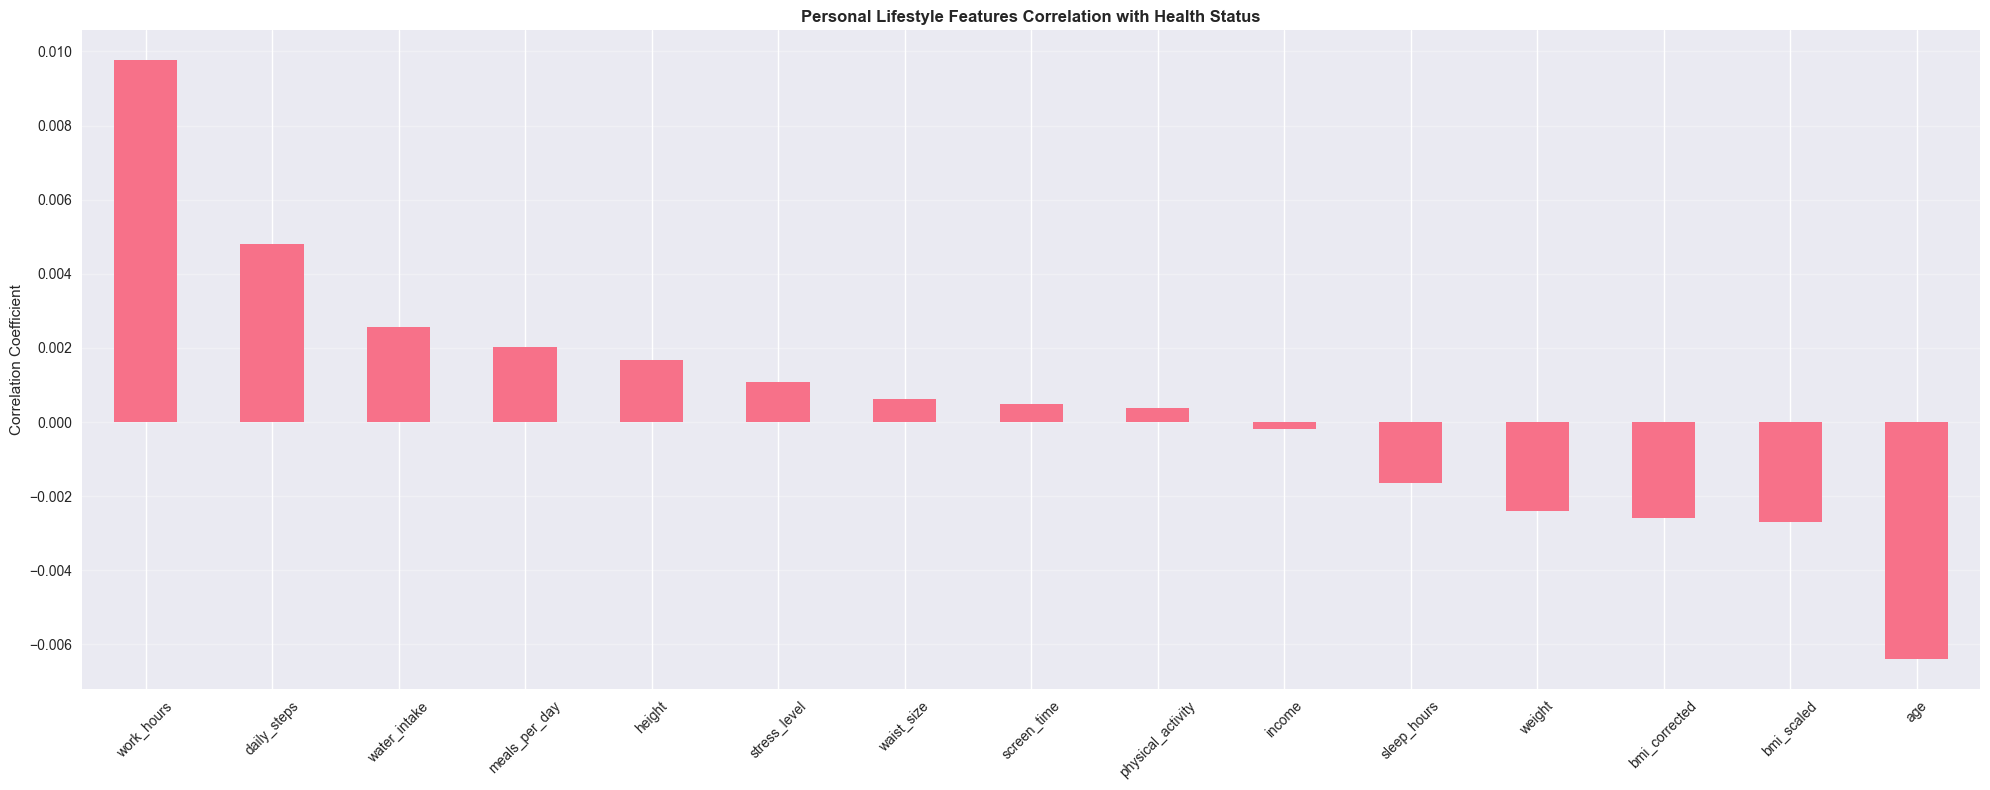

In [182]:
## Bar plot of Correlation with 'target'

df_corr = df_personal_lifestyle.copy()
df_corr['target_numeric'] = df_corr['target'].map({'healthy': 1, 'diseased': 0}) # Convert target to numeric for correlation analysis

numerical_for_corr = [col for col in numerical_columns if col not in ['survey_code', 'target_numeric']]

plt.figure(figsize=(20, 8))
df_corr[numerical_for_corr + ['target_numeric']].corr()['target_numeric'].drop('target_numeric').sort_values(ascending=False).plot(kind='bar')
plt.title('Personal Lifestyle Features Correlation with Health Status', fontweight='bold')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

#### Analysis Results

- No single lifestyle feature demonstrates meaningful linear correlation with health status. All correlation coefficients remain extremely close to zero (absolute values < 0.01), indicating minimal individual predictive power in linear relationships.
- Work_hours exhibits the highest correlation coefficient (+0.010), while age shows the lowest (-0.006). These values, though relatively strongest in the analysis, remain practically insignificant.
- Features such as income and physical_activity display correlation coefficients near zero, showing no discernible linear relationship with health status.
- Modeling implications indicate that simple linear approaches (e.g., Logistic Regression) based solely on these features would likely demonstrate poor performance.
- The relationship between lifestyle variables and health status in this dataset appears complex and non-linear, potentially requiring multi-feature interaction analysis.

### Correlation Heatmap

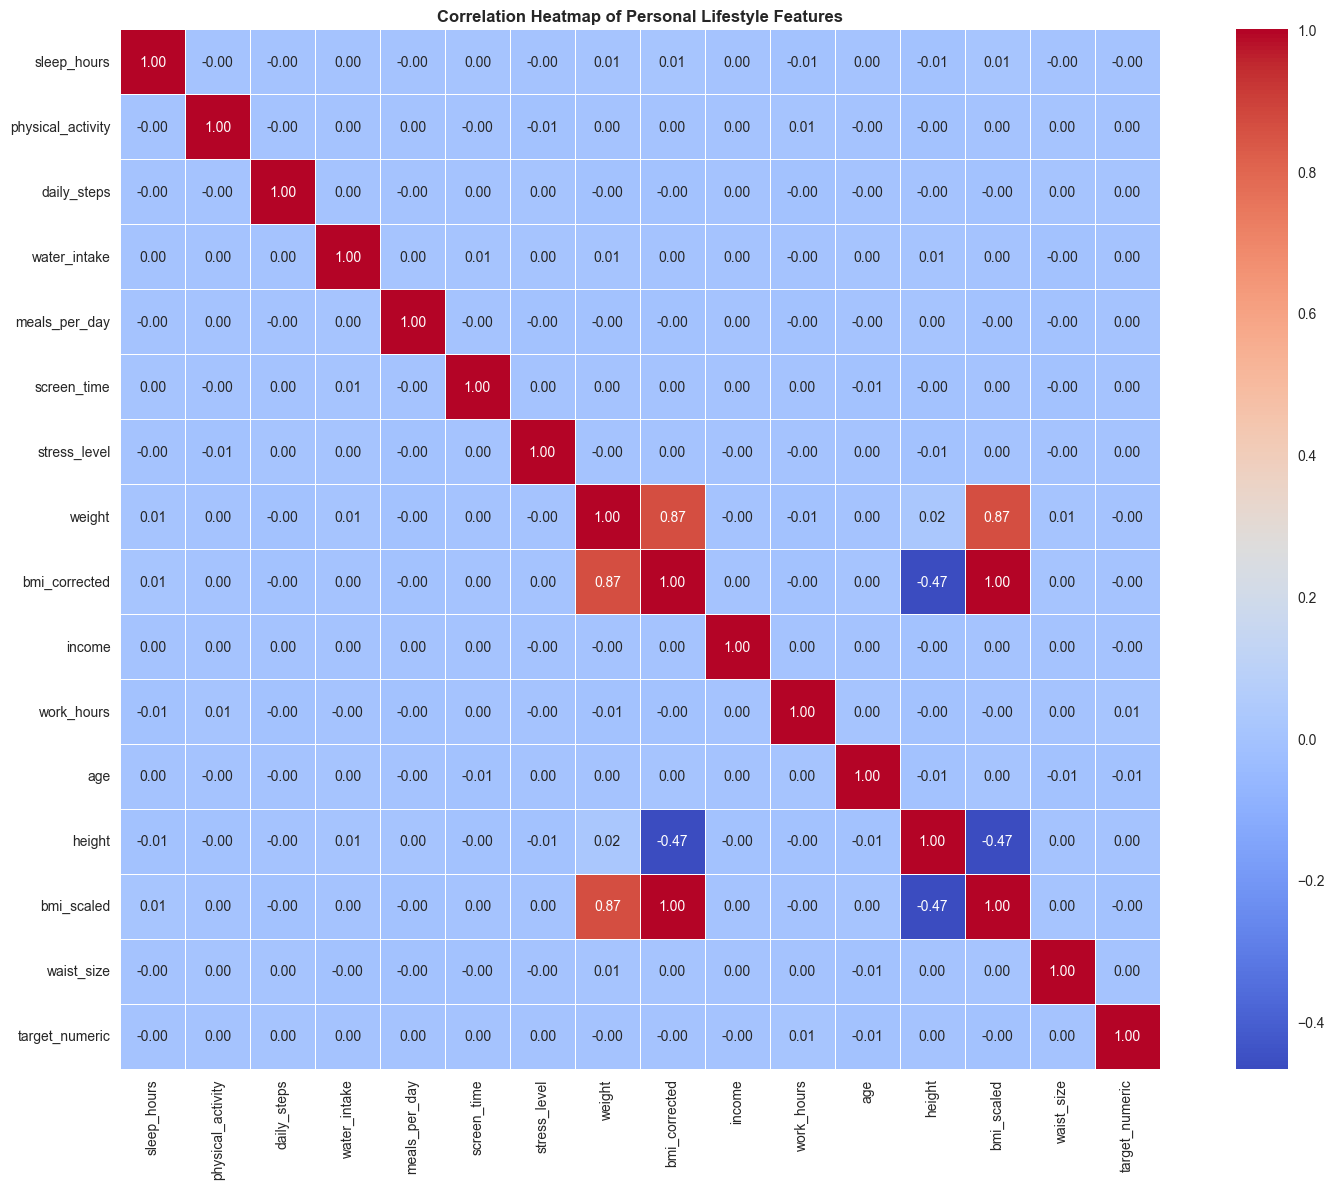

In [183]:
# correlation heatmap
plt.figure(figsize=(16, 12))
corr_matrix = df_corr[numerical_for_corr + ['target_numeric']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Heatmap of Personal Lifestyle Features', fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights
  - Obvious BMI-related correlations dominate the heatmap: 'weight', 'bmi_corrected', and 'bmi_scaled' show very strong positive
  correlations (0.87, 1.00, 0.87), confirming these are essentially measuring the same underlying body composition concept.
  - 'height' shows negative correlation with BMI measures (-0.47), which is mathematically expected since BMI = weight/height²,
  indicating taller individuals tend to have lower BMI values for similar weight ranges.
  - Lifestyle variables show minimal inter-correlations: Most personal lifestyle factors (sleep hours, physical activity, daily
  steps, water intake, meals per day, screen time, stress level) demonstrate very weak correlations with each other (mostly ≤
  0.01), suggesting they represent independent lifestyle dimensions.
  - Age demonstrates minimal correlation with lifestyle choices, indicating that personal lifestyle habits are relatively
  consistent across different age groups in this dataset.
  - Income and work hours show no significant correlation, suggesting that higher income doesn't necessarily correlate with longer
   working hours in this personal lifestyle context.
  - Physical activity metrics are surprisingly uncorrelated: Daily steps and physical activity show almost zero correlation
  (0.00), which may indicate they capture different aspects of physical fitness - structured exercise versus general movement.
  - The heatmap reveals feature independence: The lack of strong correlations between most lifestyle variables suggests that each
  factor contributes unique information to health prediction, making them valuable for comprehensive health status modeling.
  - Target variable shows weak correlations across all features, reinforcing that health status classification requires
  considering multiple lifestyle factors simultaneously rather than relying on any single dominant predictor.

### Pair Plot

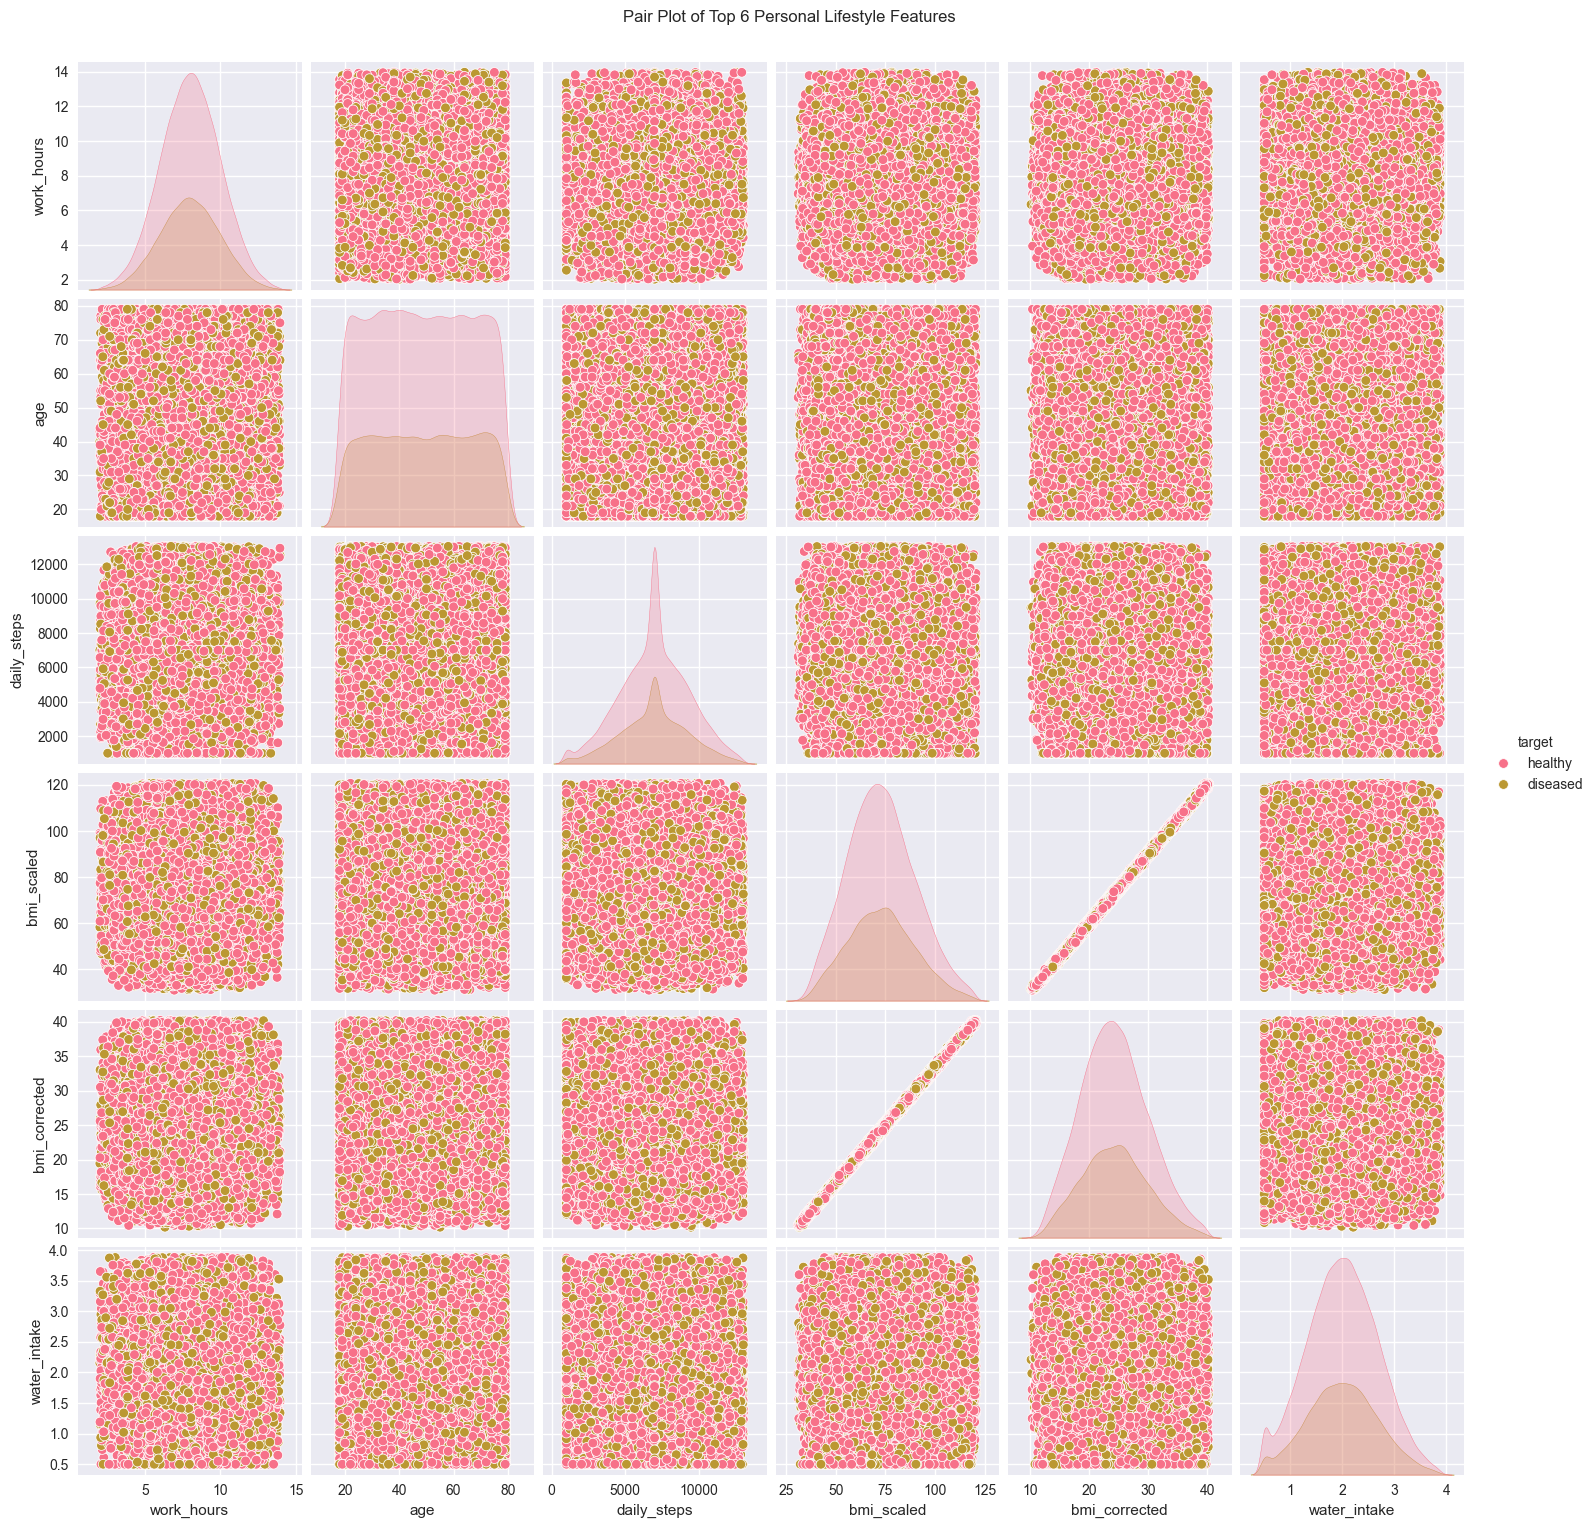

In [184]:
# Get top 6 Features Whose Correlations are Least Close to Zero.
correlations = df_corr[numerical_for_corr + ['target_numeric']].corr()['target_numeric'].drop('target_numeric')
top_6_vars = correlations.abs().sort_values(ascending=False).head(6).index.tolist()

pair_plot = sns.pairplot(df_personal_lifestyle[top_6_vars + ['target']], hue='target')
pair_plot.fig.suptitle('Pair Plot of Top 6 Personal Lifestyle Features', y=1.02)
plt.show()

#### Insights
- No Clear Separation: The most important takeaway is that neither a single feature (from the diagonal plots) nor any pair of features (from the scatter plots) can effectively separate the "healthy" and "diseased" individuals.
- Heavy Overlap: The distributions of both classes heavily overlap for every feature, indicating that they are not strong individual predictors.
- Redundancy in BMI Features: bmi_scaled and bmi_corrected are perfectly correlated, meaning one is redundant.
- Lack of Obvious Patterns: There are no clear linear or non-linear patterns between most of the other feature pairs.

#### Actions
- The Exploratory Data Analysis (EDA) revealed strong multicollinearity between the raw features (Weight, Height) and the engineered body composition feature (BMI). Specifically, bmi_corrected and bmi_scaled showed a perfect correlation of 1.00.
- And to avoid multicollinearity and leverage domain knowledge, the engineered feature BMI is selected as the sole representative for body composition. BMI is more informative than Weight or Height alone as it normalizes weight by height, which is a standard practice in health analytics.

- Drop the redundant source features (Weight, Height) and any duplicate BMI variations (e.g., drop bmi_corrected and keep bmi_scaled as the final BMI feature).

In [185]:
# Remove redundant BMI feature
df_personal_lifestyle = df_personal_lifestyle.drop(['weight', 'height', 'bmi_corrected'], axis=1)

In [186]:
# Update numerical and categorical columns after dropping 'bmi_corrected'
numerical_columns = df_personal_lifestyle.select_dtypes(include=[np.number]).columns
categorical_columns = df_personal_lifestyle.select_dtypes(include=['object', 'category']).columns
print(f"Numerical columns' count {len(numerical_columns)}:\n {numerical_columns}")
print(f"Categorical columns' count {len(categorical_columns)}:\n {categorical_columns}")

# Create target_numeric for correlation analysis after dropping 'bmi_corrected'
df_corr_updated = df_personal_lifestyle.copy()
df_corr_updated['target_numeric'] = df_corr_updated['target'].map({'healthy': 1, 'diseased': 0})

# Update correlations after dropping 'bmi_corrected'
numerical_for_corr = [col for col in numerical_columns]
correlations = df_corr_updated[numerical_for_corr + ['target_numeric']].corr()['target_numeric'].drop('target_numeric')

Numerical columns' count 12:
 Index(['sleep_hours', 'physical_activity', 'daily_steps', 'water_intake',
       'meals_per_day', 'screen_time', 'stress_level', 'income', 'work_hours',
       'age', 'bmi_scaled', 'waist_size'],
      dtype='object')
Categorical columns' count 13:
 Index(['sleep_quality', 'diet_type', 'smoking_level', 'education_level',
       'job_type', 'occupation', 'insurance', 'pet_owner', 'device_usage',
       'sunlight_exposure', 'gender', 'family_history', 'target'],
      dtype='object')


### Distribution Plots

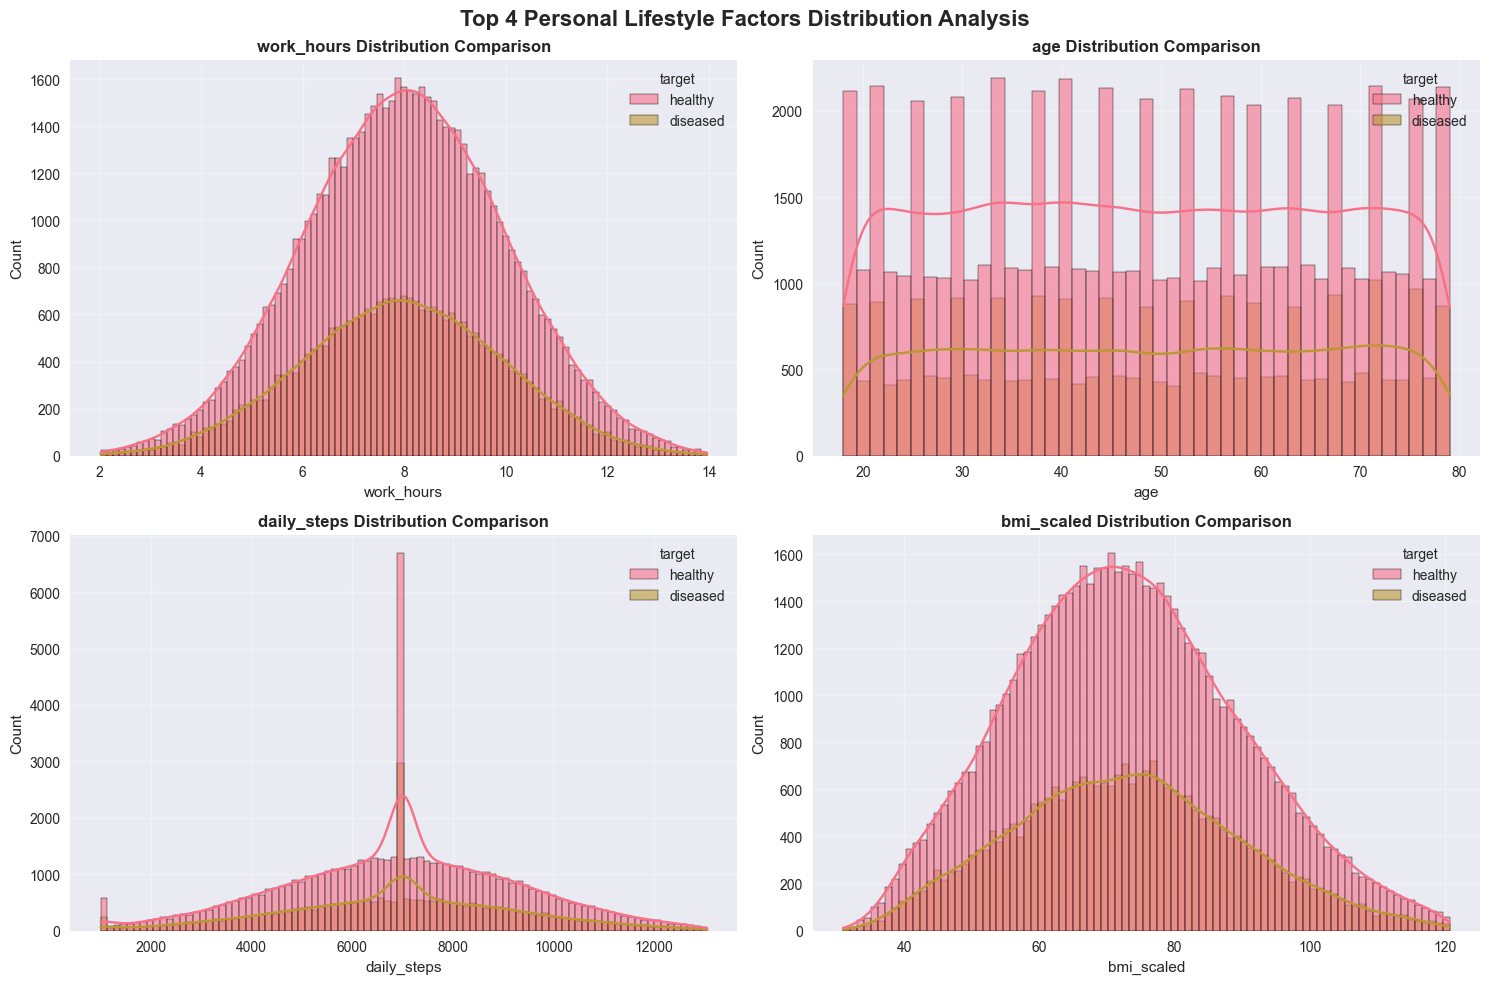

In [187]:
# Create distribution plots for top 4 most correlated variables
top_4_vars = correlations.abs().sort_values(ascending=False).head(4).index.tolist()

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(top_4_vars):
    sns.histplot(data=df_personal_lifestyle, x=var, hue='target', kde=True, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'{var} Distribution Comparison', fontweight='bold')
    axes[i].grid(alpha=0.3)

plt.suptitle('Top 4 Personal Lifestyle Factors Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights
- Overall Finding: The most critical and consistent finding across all four plots is the extreme overlap between the "healthy" (pink) and "diseased" (brown) populations. The distributions are nearly identical in shape and position.
- work_hours: The distributions for both healthy and diseased individuals are virtually the same. They are both centered around 8 hours and have the same bell-like shape. There is no significant difference.
- age: The distributions for both groups are relatively flat and uniform, and they almost perfectly overlap. This plot does not show that the prevalence of disease increases with age; it shows that for any given age, the proportion of healthy to diseased individuals is roughly the same.
- daily_steps: This plot does not show a bimodal (two-peaked) pattern. It shows a single peak around 7,000 steps for both groups. The shapes of the distributions for healthy and diseased individuals are almost identical.
- bmi_scaled: Both health groups show a nearly identical, normal-like distribution centered around the same BMI value (approximately 75). The pink and brown distributions are almost perfectly superimposed, indicating that BMI does not effectively separate the two groups in this dataset.

### Violin Plots

### Compare distribution densities between health status groups for key lifestyle variables

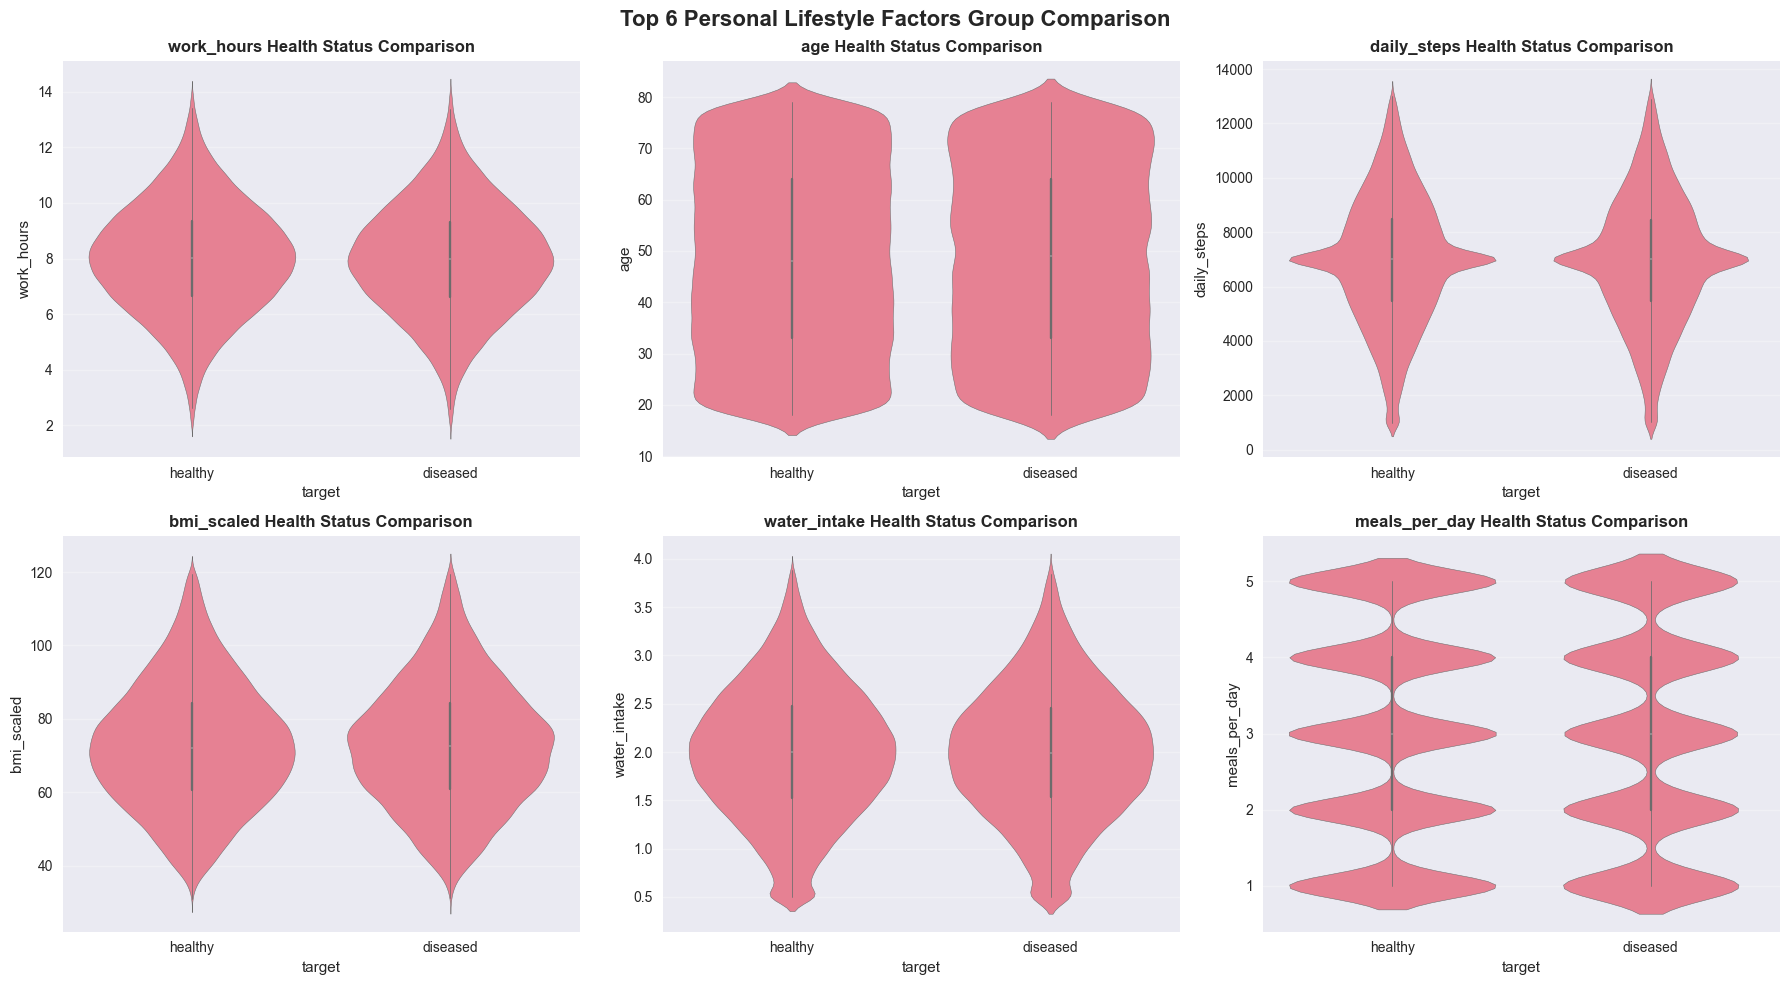

In [188]:
# Create violin plots for top 6 most correlated variables - Group Comparison Analysis
top_6_vars = correlations.abs().sort_values(ascending=False).head(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, var in enumerate(top_6_vars):
    sns.violinplot(data=df_personal_lifestyle, x='target', y=var, ax=axes[i])
    axes[i].set_title(f'{var} Health Status Comparison', fontweight='bold')
    axes[i].grid(axis='y', alpha=0.3)

plt.suptitle('Top 6 Personal Lifestyle Factors Group Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights
- Distributions Are Nearly Identical: For all six features, the distribution shape, center, and spread for the "healthy" group are almost identical to those for the "diseased" group.
- No Clear Separation: The significant overlap in the plots indicates that none of these individual features can effectively distinguish between the two health statuses.
- Weak Individual Predictors: This confirms previous findings that these lifestyle factors, when considered one by one, are very weak predictors of the health outcome in this dataset.

## 5. Age Trend Analysis

### Health status distribution across different age groups

/var/folders/1t/zrlk2vm12gv7mrv709bcyw3r0000gn/T/ipykernel_66264/2117911979.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_health_trend = df_personal_lifestyle.groupby(['age_group', 'target']).size().unstack(fill_value=0)


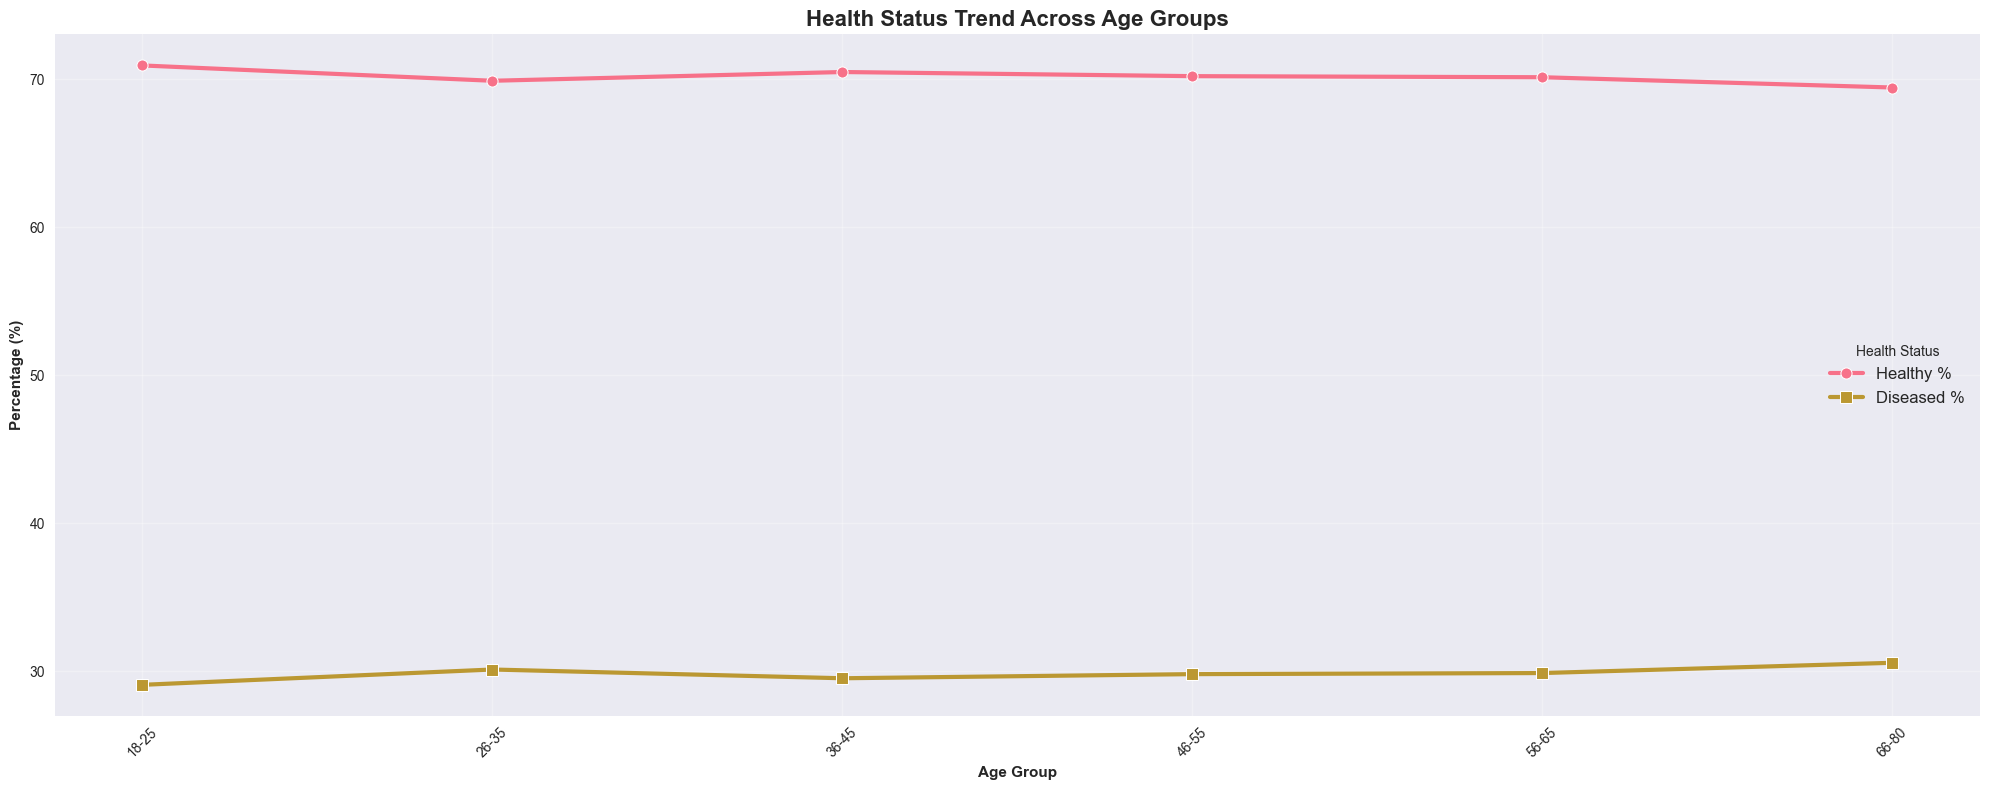

In [189]:
# Create age groups for trend analysis
df_personal_lifestyle['age_group'] = pd.cut(df_personal_lifestyle['age'], 
                                           bins=[18, 25, 35, 45, 55, 65, 80], 
                                           labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-80'])

# Calculate health status percentage by age group
age_health_trend = df_personal_lifestyle.groupby(['age_group', 'target']).size().unstack(fill_value=0)
age_health_pct = age_health_trend.div(age_health_trend.sum(axis=1), axis=0) * 100

plt.figure(figsize=(20, 8))
sns.lineplot(data=age_health_pct.reset_index(), x='age_group', y='healthy', marker='o', linewidth=3, markersize=8, label='Healthy %')
sns.lineplot(data=age_health_pct.reset_index(), x='age_group', y='diseased', marker='s', linewidth=3, markersize=8, label='Diseased %')
plt.title('Health Status Trend Across Age Groups', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Percentage (%)', fontweight='bold')
plt.legend(title='Health Status', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights
- Stable Health Status Percentages: The most striking finding is that the percentage of healthy and diseased individuals remains remarkably stable and consistent across all age groups, from 18-25 all the way to 66-80.
- No Clear Age-Related Trend: Contrary to what one might expect, this plot shows no evidence that the prevalence of disease increases with age in this dataset. The "Diseased %" line is nearly flat, hovering around 30% for all age groups. Similarly, the "Healthy %" is flat at around 70%.
- Confirmation of Previous EDA: It confirms that age, like the other individual features, is not a strong predictor of health status on its own. 

### KDE Density Plot Analysis
#### Analyze relationship between key lifestyle variables using kernel density estimation

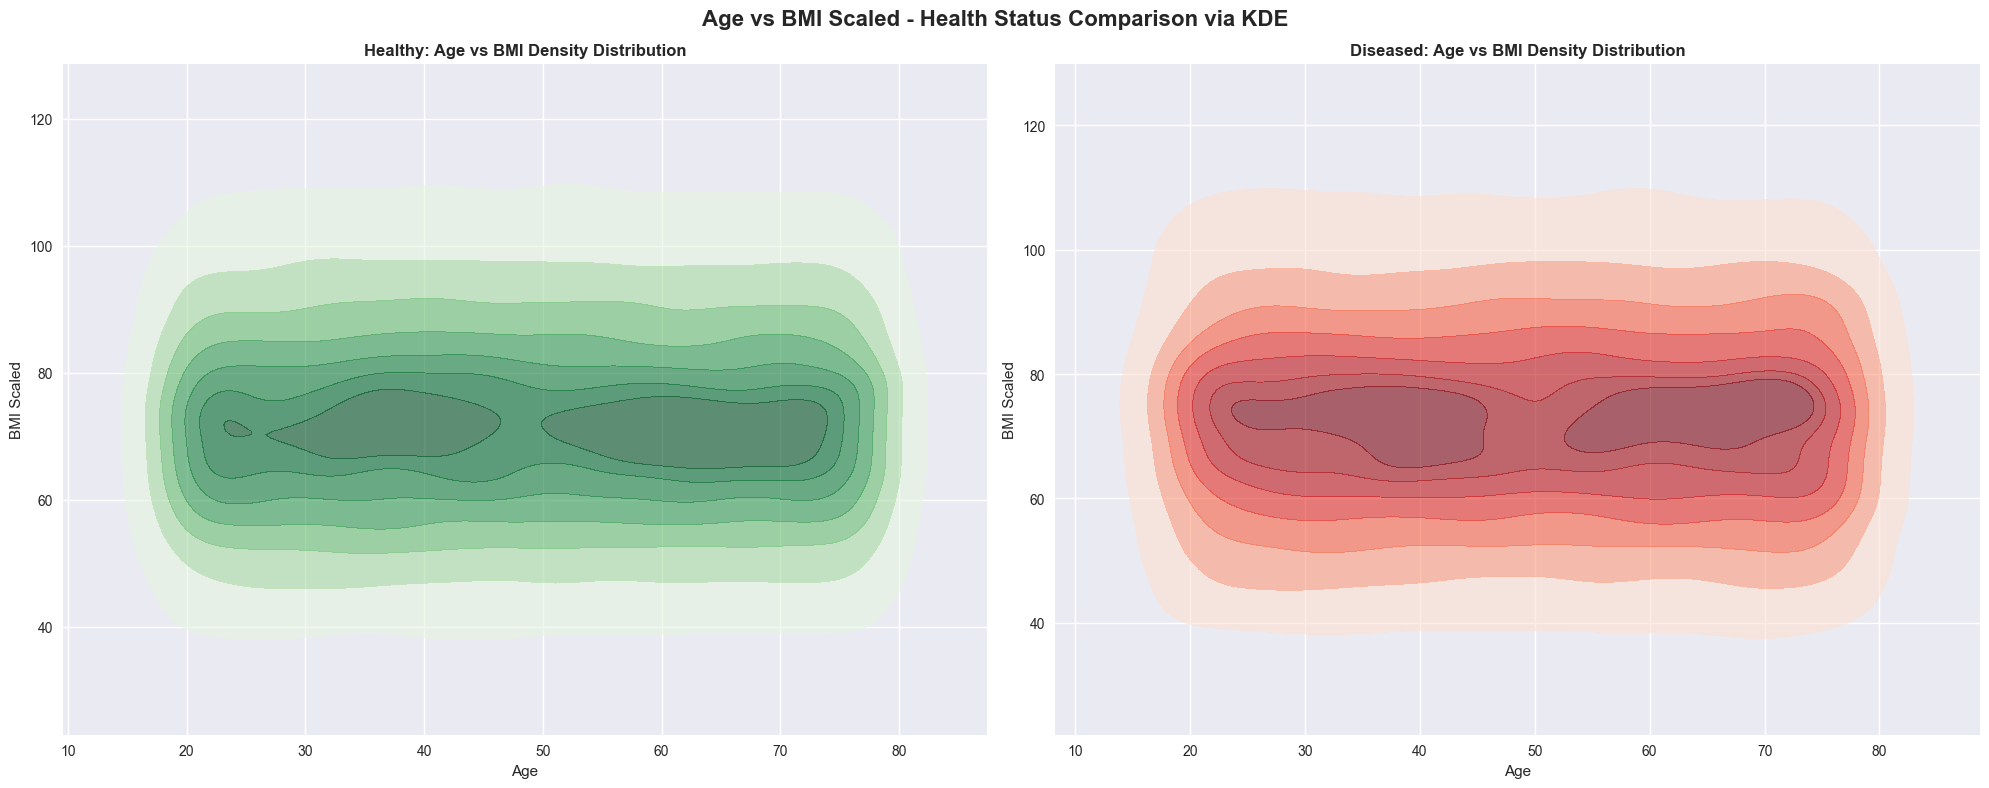

In [190]:
# KDE Plot 1: BMI vs Age relationship with health status
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_personal_lifestyle[df_personal_lifestyle['target'] == 'healthy'], 
            x='age', y='bmi_scaled', cmap='Greens', fill=True, levels=8, alpha=0.6)
plt.title('Healthy: Age vs BMI Density Distribution', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('BMI Scaled')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_personal_lifestyle[df_personal_lifestyle['target'] == 'diseased'], 
            x='age', y='bmi_scaled', cmap='Reds', fill=True, levels=8, alpha=0.6)
plt.title('Diseased: Age vs BMI Density Distribution', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('BMI Scaled')

plt.suptitle('Age vs BMI Scaled - Health Status Comparison via KDE', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

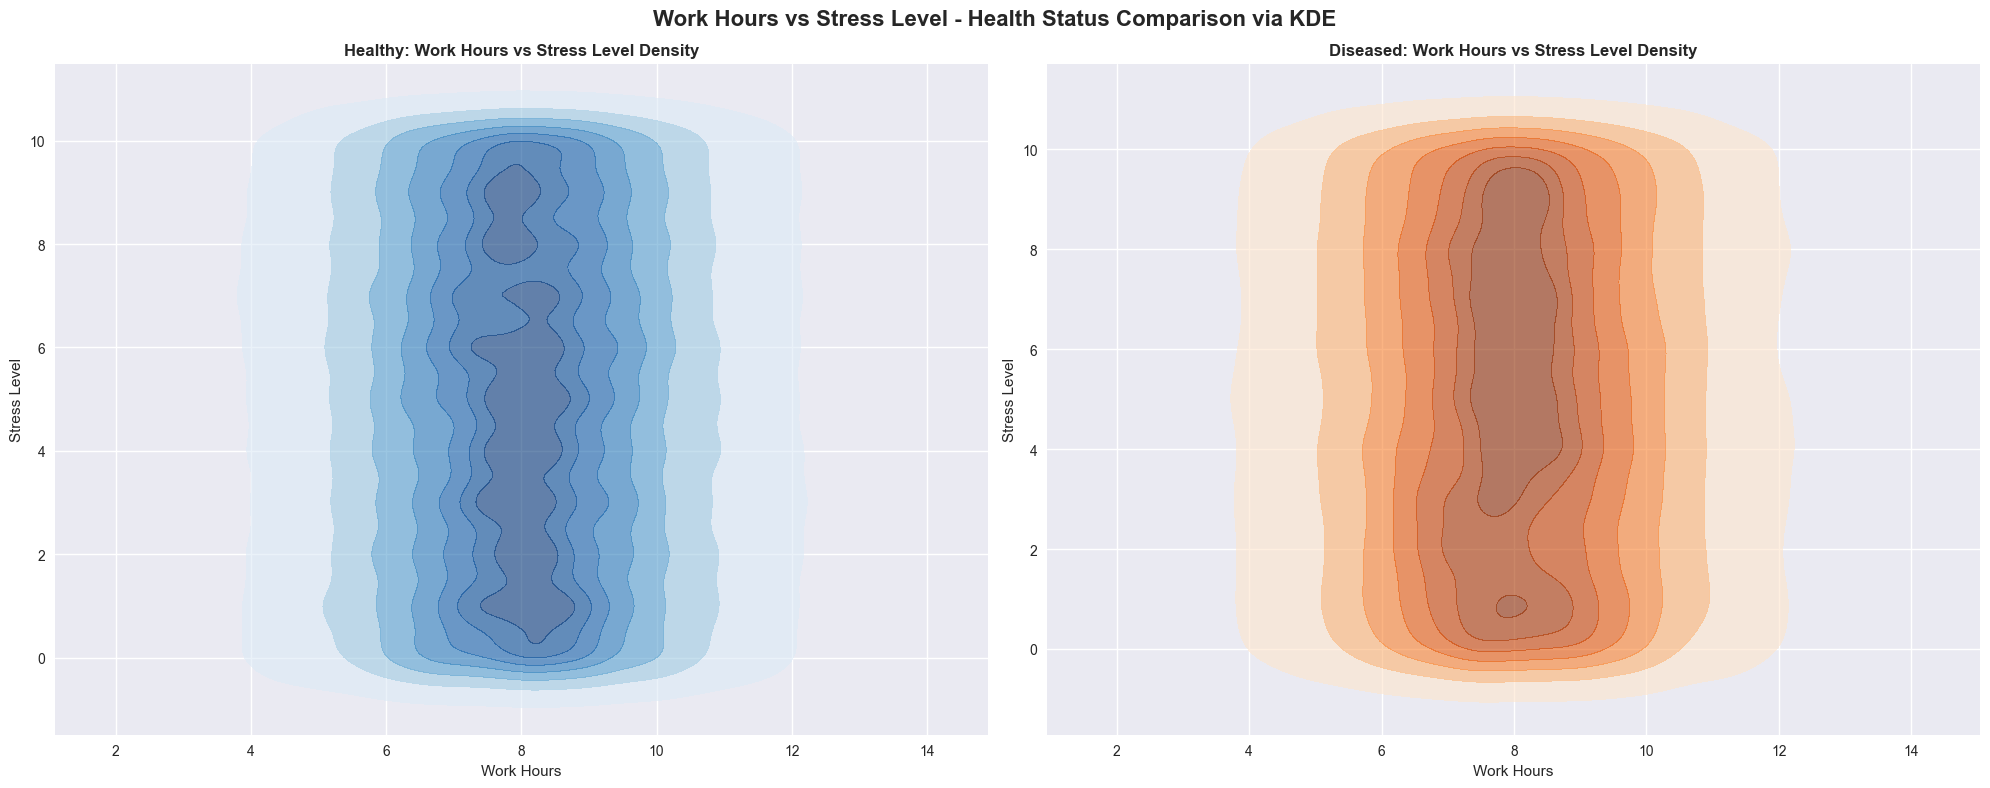

In [191]:
# KDE Plot 2: Work Hours vs Stress Level relationship with health status
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_personal_lifestyle[df_personal_lifestyle['target'] == 'healthy'], 
            x='work_hours', y='stress_level', cmap='Blues', fill=True, levels=8, alpha=0.6)
plt.title('Healthy: Work Hours vs Stress Level Density', fontweight='bold')
plt.xlabel('Work Hours')
plt.ylabel('Stress Level')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_personal_lifestyle[df_personal_lifestyle['target'] == 'diseased'], 
            x='work_hours', y='stress_level', cmap='Oranges', fill=True, levels=8, alpha=0.6)
plt.title('Diseased: Work Hours vs Stress Level Density', fontweight='bold')
plt.xlabel('Work Hours')
plt.ylabel('Stress Level')

plt.suptitle('Work Hours vs Stress Level - Health Status Comparison via KDE', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

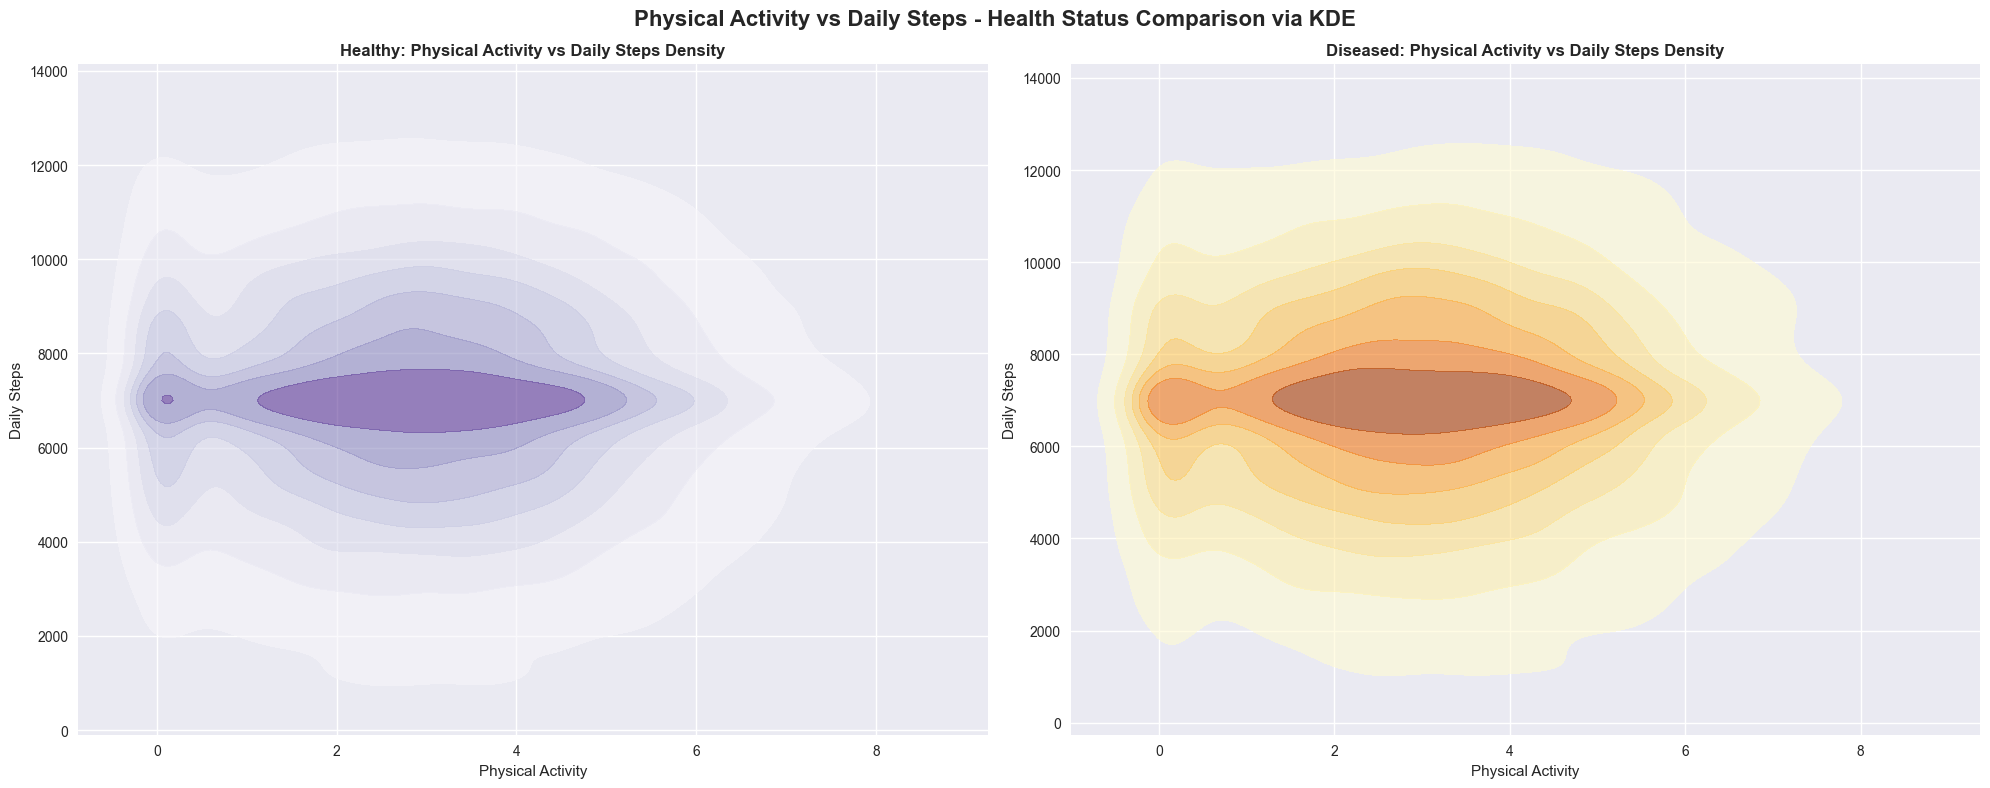

In [192]:
# KDE Plot 3: Physical Activity vs Daily Steps relationship
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df_personal_lifestyle[df_personal_lifestyle['target'] == 'healthy'], 
            x='physical_activity', y='daily_steps', cmap='Purples', fill=True, levels=8, alpha=0.6)
plt.title('Healthy: Physical Activity vs Daily Steps Density', fontweight='bold')
plt.xlabel('Physical Activity')
plt.ylabel('Daily Steps')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df_personal_lifestyle[df_personal_lifestyle['target'] == 'diseased'], 
            x='physical_activity', y='daily_steps', cmap='YlOrBr', fill=True, levels=8, alpha=0.6)
plt.title('Diseased: Physical Activity vs Daily Steps Density', fontweight='bold')
plt.xlabel('Physical Activity')
plt.ylabel('Daily Steps')

plt.suptitle('Physical Activity vs Daily Steps - Health Status Comparison via KDE', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

#### Insights
- Age and BMI: The most common combinations of age and BMI are the same for both healthy and diseased people. There isn't a specific age/BMI combination that clearly points to one group over the other.
- Work Hours and Stress: Both groups show that most people work between 6-9 hours, and within that time, their stress levels can be high, low, or anywhere in between. There is no unique "work/stress" pattern for either the healthy or the diseased group.
- Activity and Steps: Both groups have a very similar pattern, with most people's activity concentrated around 7,000 daily steps and a low-to-moderate physical activity score.

### Summary
Whether examining one feature at a time or pairs of features together, the lifestyle data for the healthy group is practically indistinguishable from the data for the diseased group. This strongly suggests that a successful prediction will require a sophisticated model that can find very complex patterns across many features at once, rather than relying on simple rules.

## Categorical Variable Analysis
### Getting Unique values in categorical columns

/var/folders/1t/zrlk2vm12gv7mrv709bcyw3r0000gn/T/ipykernel_66264/1067504201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='Set2')


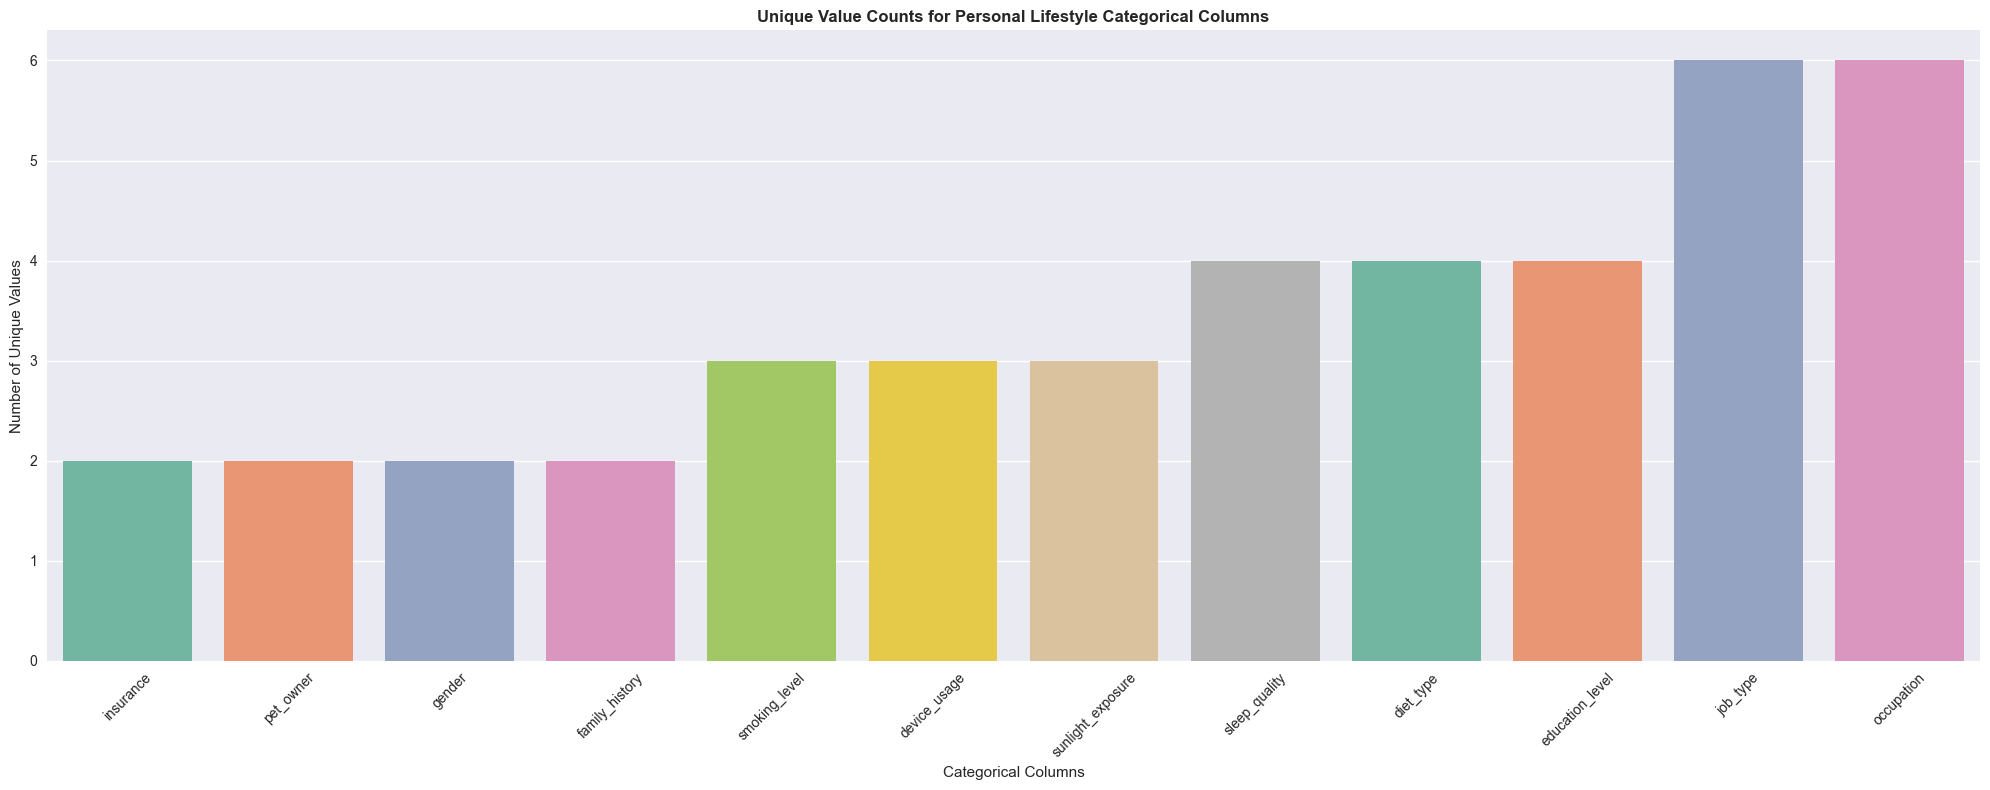

Detailed Unique Value Counts:
sleep_quality: 4 unique values
  Values: ['Good', 'Poor', 'Excellent', 'Fair']

diet_type: 4 unique values
  Values: ['Vegan', 'Vegetarian', 'Omnivore', 'Keto']

smoking_level: 3 unique values
  Values: ['Light', 'Heavy', 'Non-smoker']

education_level: 4 unique values
  Values: ['High School', 'Master', 'Bachelor', 'PhD']

job_type: 6 unique values
  Values: ['Office', 'Labor', 'Unemployed', 'Tech', 'Service', 'Healthcare']

occupation: 6 unique values
  Values: ['Engineer', 'Teacher', 'Doctor', 'Farmer', 'Driver', 'Artist']

insurance: 2 unique values
  Values: ['No', 'Yes']

pet_owner: 2 unique values
  Values: ['No', 'Yes']

device_usage: 3 unique values
  Values: ['Moderate', 'High', 'Low']

sunlight_exposure: 3 unique values
  Values: ['High', 'Low', 'Moderate']

gender: 2 unique values
  Values: ['Female', 'Male']

family_history: 2 unique values
  Values: ['Yes', 'No']



In [193]:
# Get unique value counts for categorical columns 
categorical_for_analysis = [col for col in categorical_columns if col != 'target']
unique_counts = df_personal_lifestyle[categorical_for_analysis].nunique().sort_values()

plt.figure(figsize=(20, 8))
sns.barplot(x=unique_counts.index, y=unique_counts.values, palette='Set2')
plt.title('Unique Value Counts for Personal Lifestyle Categorical Columns', fontweight='bold')
plt.xlabel('Categorical Columns')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display detailed unique count information
print('Detailed Unique Value Counts:')
print('='*50)
for col in categorical_for_analysis:
    count = unique_counts[col]
    print(f'{col}: {count} unique values')
    if count <= 10:  # Show actual values for columns with few unique values
        unique_vals = df_personal_lifestyle[col].unique()
        print(f'  Values: {list(unique_vals)}')
    print()

### Chi-square Test Analysis for Categorical Variables
#### Statistical relationship analysis between categorical variables and health status

In [194]:
# Perform chi-square test for each categorical variable vs target
chi_square_results = []
categorical_for_test = [col for col in categorical_columns if col != 'target']

print("Chi-square Test Results: Categorical Variables vs Health Status")
print("=" * 80)
print(f"{'Variable':<20} {'Chi2 Statistic':<15} {'p-value':<12} {'Significance':<15}")
print("-" * 80)

significant_variables = []  # Store only significant variables

for var in categorical_for_test:
    # Create contingency table
    crosstab = pd.crosstab(df_personal_lifestyle[var], df_personal_lifestyle['target'])
    
    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(crosstab)
    
    # Determine significance level
    if p_value < 0.001:
        significance = "***"
        is_significant = True
    elif p_value < 0.01:
        significance = "**"
        is_significant = True
    elif p_value < 0.05:
        significance = "*"
        is_significant = True
    else:
        significance = "ns"
        is_significant = False
    
    if is_significant:
        significant_variables.append(var)
        print(f"{var:<20} {chi2_stat:<15.4f} {p_value:<12.6f} {significance:<15}")
    else:
        print(f"{var:<20} {chi2_stat:<15.4f} {p_value:<12.6f} {significance:<15}")

print(f"\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant")
print(f"Number of significant associations: {len(significant_variables)} out of {len(categorical_for_test)}")



Chi-square Test Results: Categorical Variables vs Health Status
Variable             Chi2 Statistic  p-value      Significance   
--------------------------------------------------------------------------------
sleep_quality        3.9169          0.270576     ns             
diet_type            0.7983          0.849885     ns             
smoking_level        0.6977          0.705511     ns             
education_level      1.0642          0.785715     ns             
job_type             7.9112          0.161196     ns             
occupation           2.2641          0.811518     ns             
insurance            0.0846          0.771207     ns             
pet_owner            0.0022          0.962177     ns             
device_usage         0.7669          0.681496     ns             
sunlight_exposure    0.0307          0.984785     ns             
gender               0.5232          0.469484     ns             
family_history       0.0039          0.950227     ns           

### Insights and Summary
All categorical lifestyle variables show no significant association with health status, confirming the pattern seen in numerical variables that health prediction in this dataset requires complex, multi-variable approaches rather than simple individual factor analysis.

## Save the cleaned dataset for modeling

In [195]:
# Export final cleaned dataset
final_export_path = 'data/final_personal_lifestyle_dataset.csv'
df_personal_lifestyle_export = df_personal_lifestyle.reset_index()
df_personal_lifestyle_export.to_csv(final_export_path, index=False)

print(f"Final dataset shape: {df_personal_lifestyle.shape}")
print(f"Dataset exported to: {final_export_path}")

Final dataset shape: (93436, 26)
Dataset exported to: data/final_personal_lifestyle_dataset.csv
